# Analyzing Used Car Listings on eBay

In this project, we'll work with a dataset of used cars from German eBay website.

The data dictionary is as follows:

* `dateCrawled` - When this ad was first crawled. or posted date time
* `name` - Name of the car.
* `seller` - Whether the seller is private or a dealer.
* `offerType` - The type of listing
* `price` - The price on the ad to sell the car.
* `abtest` - Whether the listing is included in an A/B test.
* `vehicleType` - The vehicle Type.
* `yearOfRegistration` - The year in which the car was first registered.
* `gearbox` - The transmission type.
* `powerPS` - The power of the car in PS.
* `model` - The car model name.
* `kilometer` - How many kilometers the car has driven.
* `monthOfRegistration` - The month in which the car was first registered.
* `fuelType` - What type of fuel the car uses.
* `brand` - The brand of the car.
* `notRepairedDamage` - If the car has a damage which is not yet repaired.
* `dateCreated` - The date on which the eBay listing was created.
* `nrOfPictures` - The number of pictures in the ad.
* `postalCode` - The postal code for the location of the vehicle.
* `lastSeenOnline` - When the crawler saw this ad last online.

* The aim of this project is to analyze the used car listings
* eBay is German wesite for dif products
* main aim is to buy car on resonable price based on millage, resale, not damamged and brand
* so we will find more resale car, lexuary car, more milage and brand in data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
autos = pd.read_csv("autos.csv", encoding = " latin-1") # utf-8, latin-1, 
                                                        #windows-1251
                                                        #main aim is to bring back from binaryto human understanable form
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [4]:
autos.describe()

,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [5]:
autos.describe(include="all") #this will works on all int and str 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-14 20:50:02,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [6]:
autos.drop(["seller","offerType","nrOfPictures"],axis=1,inplace=True)
#we did not need above  data because not need of seller,offerType and no. of pictures

In [7]:
autos.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


In [8]:
autos.columns

Index(['dateCrawled', 'name', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'odometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [9]:
autos.index

RangeIndex(start=0, stop=50000, step=1)

In [10]:
autos.count()

dateCrawled            50000
name                   50000
price                  50000
abtest                 50000
vehicleType            44905
yearOfRegistration     50000
gearbox                47320
powerPS                50000
model                  47242
odometer               50000
monthOfRegistration    50000
fuelType               45518
brand                  50000
notRepairedDamage      40171
dateCreated            50000
postalCode             50000
lastSeen               50000
dtype: int64

In [11]:
autos.dateCrawled

0        2016-03-26 17:47:46
1        2016-04-04 13:38:56
2        2016-03-26 18:57:24
3        2016-03-12 16:58:10
4        2016-04-01 14:38:50
                ...         
49995    2016-03-27 14:38:19
49996    2016-03-28 10:50:25
49997    2016-04-02 14:44:48
49998    2016-03-08 19:25:42
49999    2016-03-14 00:42:12
Name: dateCrawled, Length: 50000, dtype: object

In [12]:
autos["dateCrawled"]=pd.to_datetime(autos["dateCrawled"])

In [13]:
autos["dateCrawled"].max() # year,month,date mean we keep data from 1883 to 2016 there is error in year of registeration max 1000

Timestamp('2016-04-07 14:36:56')

In [14]:
# we need price in int form
autos["price"].head(2)

0    $5,000
1    $8,500
Name: price, dtype: object

In [15]:
autos["price"]=autos["price"].str.replace("$","").str.replace(",","").astype(int)
autos["price"]
#remove $ and , sign from  price 

0         5000
1         8500
2         8990
3         4350
4         1350
         ...  
49995    24900
49996     1980
49997    13200
49998    22900
49999     1250
Name: price, Length: 50000, dtype: int32

In [16]:
type(autos["price"][1])

numpy.int32

autos["price"].str.strip("$").str.replace(",","") # we can use this also but strip works only at start and end , not in mid

In [17]:
autos["odometer"]=autos["odometer"].str.strip("km").str.replace(",","").astype(int)
autos["odometer"]

0        150000
1        150000
2         70000
3         70000
4        150000
          ...  
49995    100000
49996    150000
49997      5000
49998     40000
49999    150000
Name: odometer, Length: 50000, dtype: int32

In [18]:
type(autos["odometer"][1])

numpy.int32

In [19]:
#remove the irrelevent years
print(autos["yearOfRegistration"].max())
print(autos["yearOfRegistration"].min())


9999
1000


In [20]:
autos["yearOfRegistration"].value_counts()

2000    3354
2005    3015
1999    3000
2004    2737
2003    2727
        ... 
1931       1
1929       1
1001       1
9996       1
1952       1
Name: yearOfRegistration, Length: 97, dtype: int64

In [21]:
autos["yearOfRegistration"].value_counts().sort_index().head(10)

1000    1
1001    1
1111    1
1500    1
1800    2
1910    9
1927    1
1929    1
1931    1
1934    2
Name: yearOfRegistration, dtype: int64

In [22]:
autos["yearOfRegistration"].value_counts().sort_index().tail(16)

2015     399
2016    1316
2017    1453
2018     492
2019       3
2800       1
4100       1
4500       1
4800       1
5000       4
5911       1
6200       1
8888       1
9000       2
9996       1
9999       4
Name: yearOfRegistration, dtype: int64

In [23]:
#we have to keep the data from 1900 to 2016

In [24]:
(autos["yearOfRegistration"]>1900) & (autos["yearOfRegistration"]<2016)

0        True
1        True
2        True
3        True
4        True
         ... 
49995    True
49996    True
49997    True
49998    True
49999    True
Name: yearOfRegistration, Length: 50000, dtype: bool

In [25]:
((autos["yearOfRegistration"]>1900) & (autos["yearOfRegistration"]<=2016)).sum()

48028

In [26]:
(50000-48028)

1972

In [27]:
round((1972*100)/50000) #4 % data remove

4

# between and OR | works same, openeing and ending values also include

In [28]:
autos["yearOfRegistration"].between(1900,2016).sum()

48028

In [29]:
(~(autos["yearOfRegistration"].between(1900,2016))).sum() 
#show the valuses that is not in between

1972

In [30]:
autos.shape[0]

50000

In [31]:
autos.shape[1]

17

In [32]:
(~(autos["yearOfRegistration"].between(1900,2016))).sum()*100/autos.shape[0]

3.944

In [33]:
round((~(autos["yearOfRegistration"].between(1900,2016))).sum()*100/autos.shape[0])

4

In [34]:
bool_reg=autos["yearOfRegistration"].between(1900,2016)
bool_reg

0        True
1        True
2        True
3        True
4        True
         ... 
49995    True
49996    True
49997    True
49998    True
49999    True
Name: yearOfRegistration, Length: 50000, dtype: bool

In [35]:
corrected_autos=autos[bool_reg].copy() # when we move from 1 df to another df then we should make a copy
corrected_autos

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,2016-04-02 00:00:00,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


In [36]:
print(corrected_autos["yearOfRegistration"].max())
print(corrected_autos["yearOfRegistration"].min())

2016
1910


In [37]:
corrected_autos["price"].describe()

count    4.802800e+04
mean     9.585252e+03
std      4.843817e+05
min      0.000000e+00
25%      1.150000e+03
50%      2.990000e+03
75%      7.400000e+03
max      1.000000e+08
Name: price, dtype: float64

In [38]:
corrected_autos["price"].value_counts()
#bedding can not start with zero

0        1335
500       757
1500      696
2500      614
1200      606
         ... 
28850       1
16998       1
2671        1
27299       1
84997       1
Name: price, Length: 2334, dtype: int64

In [39]:
corrected_autos["price"].value_counts().sort_index()

0           1335
1            150
2              2
3              1
5              2
            ... 
10000000       1
11111111       2
12345678       1
27322222       1
99999999       1
Name: price, Length: 2334, dtype: int64

In [40]:
corrected_autos["price"].value_counts().sort_index().tail(15)

265000      1
295000      1
299000      1
345000      1
350000      1
999990      1
999999      2
1234566     1
1300000     1
3890000     1
10000000    1
11111111    2
12345678    1
27322222    1
99999999    1
Name: price, dtype: int64

In [41]:
bool_price=corrected_autos["price"].between(1,350000)
bool_price

0        True
1        True
2        True
3        True
4        True
         ... 
49995    True
49996    True
49997    True
49998    True
49999    True
Name: price, Length: 48028, dtype: bool

In [42]:
corrected_autos_v1=corrected_autos[bool_price].copy()
corrected_autos_v1

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,2016-04-02 00:00:00,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


In [43]:
corrected_autos_v1["price"].describe()

count     46681.000000
mean       5977.716801
std        9177.909479
min           1.000000
25%        1250.000000
50%        3100.000000
75%        7500.000000
max      350000.000000
Name: price, dtype: float64

In [44]:
#calculate % of missing data
(corrected_autos.shape[0]-corrected_autos_v1.shape[0])*100/corrected_autos.shape[0]

2.8046139751811445

In [45]:
corrected_autos_v1.shape

(46681, 17)

In [46]:
corrected_autos_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46681 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          46681 non-null  datetime64[ns]
 1   name                 46681 non-null  object        
 2   price                46681 non-null  int32         
 3   abtest               46681 non-null  object        
 4   vehicleType          43977 non-null  object        
 5   yearOfRegistration   46681 non-null  int64         
 6   gearbox              44571 non-null  object        
 7   powerPS              46681 non-null  int64         
 8   model                44488 non-null  object        
 9   odometer             46681 non-null  int32         
 10  monthOfRegistration  46681 non-null  int64         
 11  fuelType             43363 non-null  object        
 12  brand                46681 non-null  object        
 13  notRepairedDamage    38374 non-

# almost 6 % data remove from start to now

now check which brand is most familar

In [47]:
corrected_autos_v1["brand"].value_counts()

volkswagen        9862
bmw               5137
opel              5022
mercedes_benz     4503
audi              4041
ford              3263
renault           2201
peugeot           1393
fiat              1197
seat               853
skoda              766
nissan             713
mazda              709
smart              661
citroen            654
toyota             593
hyundai            468
sonstige_autos     458
volvo              427
mini               409
mitsubishi         384
honda              366
kia                330
alfa_romeo         310
porsche            286
suzuki             277
chevrolet          266
chrysler           164
dacia              123
daihatsu           117
jeep               106
subaru             100
land_rover          98
saab                77
jaguar              73
daewoo              70
trabant             65
rover               62
lancia              50
lada                27
Name: brand, dtype: int64

# now we want to check the volkswagen overall wearth in data

In [48]:
corrected_autos_v1["brand"].value_counts(normalize=True)*100

volkswagen        21.126368
bmw               11.004477
opel              10.758124
mercedes_benz      9.646323
audi               8.656627
ford               6.989996
renault            4.714980
peugeot            2.984083
fiat               2.564212
seat               1.827296
skoda              1.640925
nissan             1.527388
mazda              1.518819
smart              1.415994
citroen            1.400998
toyota             1.270324
hyundai            1.002549
sonstige_autos     0.981127
volvo              0.914719
mini               0.876159
mitsubishi         0.822604
honda              0.784045
kia                0.706926
alfa_romeo         0.664082
porsche            0.612669
suzuki             0.593389
chevrolet          0.569825
chrysler           0.351321
dacia              0.263490
daihatsu           0.250637
jeep               0.227073
subaru             0.214220
land_rover         0.209936
saab               0.164949
jaguar             0.156381
daewoo             0

In [49]:
#this will find the percentage of all data, 1st make it normalized then multiply by 100
#volkswagen may provide more funtions then others provide more luxiary and more satisfication to client 
# so we just keep the data only that have 5% wearth in data 
normalized_brand=corrected_autos_v1["brand"].value_counts(normalize=True)*100
normalized_brand

volkswagen        21.126368
bmw               11.004477
opel              10.758124
mercedes_benz      9.646323
audi               8.656627
ford               6.989996
renault            4.714980
peugeot            2.984083
fiat               2.564212
seat               1.827296
skoda              1.640925
nissan             1.527388
mazda              1.518819
smart              1.415994
citroen            1.400998
toyota             1.270324
hyundai            1.002549
sonstige_autos     0.981127
volvo              0.914719
mini               0.876159
mitsubishi         0.822604
honda              0.784045
kia                0.706926
alfa_romeo         0.664082
porsche            0.612669
suzuki             0.593389
chevrolet          0.569825
chrysler           0.351321
dacia              0.263490
daihatsu           0.250637
jeep               0.227073
subaru             0.214220
land_rover         0.209936
saab               0.164949
jaguar             0.156381
daewoo             0

In [50]:
bol_brand=normalized_brand>5
bol_brand

volkswagen         True
bmw                True
opel               True
mercedes_benz      True
audi               True
ford               True
renault           False
peugeot           False
fiat              False
seat              False
skoda             False
nissan            False
mazda             False
smart             False
citroen           False
toyota            False
hyundai           False
sonstige_autos    False
volvo             False
mini              False
mitsubishi        False
honda             False
kia               False
alfa_romeo        False
porsche           False
suzuki            False
chevrolet         False
chrysler          False
dacia             False
daihatsu          False
jeep              False
subaru            False
land_rover        False
saab              False
jaguar            False
daewoo            False
trabant           False
rover             False
lancia            False
lada              False
Name: brand, dtype: bool

In [51]:
common_brand=normalized_brand[bol_brand]
common_brand
# so this is only that have 5 % wearth

volkswagen       21.126368
bmw              11.004477
opel             10.758124
mercedes_benz     9.646323
audi              8.656627
ford              6.989996
Name: brand, dtype: float64

In [52]:
common_brand.index
#we have to work on only these brands only

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [53]:
#corrected_autos_v1["brand"] == 'volkswagen' |corrected_autos_v1["brand"] == 'bmw'-----------
#we have to work on this data only so we can filter out as above or follow 2nd way

In [54]:
corrected_autos_v1[corrected_autos_v1["brand"]=='volkswagen']
#we use membership operator which is easy

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,300,test,limousine,1995,manuell,90,golf,150000,8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,1990,control,limousine,1998,manuell,90,golf,150000,12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32
17,2016-03-29 11:46:22,Volkswagen_Scirocco_2_G60,5500,test,coupe,1990,manuell,205,scirocco,150000,6,benzin,volkswagen,nein,2016-03-29 00:00:00,74821,2016-04-05 20:46:26
26,2016-04-03 22:46:28,Volkswagen_Polo_Fox,777,control,kleinwagen,1992,manuell,54,polo,125000,2,benzin,volkswagen,nein,2016-04-03 00:00:00,38110,2016-04-05 23:46:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49967,2016-03-12 11:50:17,VW_Passat_2_0_TDI_comfortline,4999,test,kombi,2006,manuell,140,passat,150000,5,diesel,volkswagen,NaN,2016-03-12 00:00:00,70619,2016-03-17 09:45:12
49971,2016-03-29 14:54:12,W.Lupo_1.0,950,test,kleinwagen,2001,manuell,50,lupo,150000,4,benzin,volkswagen,nein,2016-03-29 00:00:00,65197,2016-03-29 20:41:51
49979,2016-03-20 18:38:40,Volkswagen_Polo_1.6_TDI_Style,11000,test,kleinwagen,2011,manuell,90,polo,70000,11,diesel,volkswagen,nein,2016-03-20 00:00:00,48455,2016-04-07 01:45:12
49985,2016-04-02 16:38:23,Verkaufe_meinen_vw_vento!,1000,control,NaN,1995,automatik,0,NaN,150000,0,benzin,volkswagen,NaN,2016-04-02 00:00:00,30900,2016-04-06 15:17:52


# memeberhip operator 

In [55]:
bol_com_brand=corrected_autos_v1["brand"].isin(common_brand.index)
bol_com_brand

0        False
1         True
2         True
3        False
4         True
         ...  
49995     True
49996     True
49997    False
49998     True
49999     True
Name: brand, Length: 46681, dtype: bool

In [56]:
corrected_autos_v1[bol_com_brand]
#now we have the data of just common_brand.index

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,300,test,limousine,1995,manuell,90,golf,150000,8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,1990,control,limousine,1998,manuell,90,golf,150000,12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2016-03-22 17:36:42,Audi_A6__S6__Avant_4.2_quattro_eventuell_Tausc...,5000,control,kombi,2001,automatik,299,a6,150000,1,benzin,audi,nein,2016-03-22 00:00:00,46537,2016-04-06 08:16:39
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


In [57]:
popular_brands=corrected_autos_v1[bol_com_brand].copy()
popular_brands

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,300,test,limousine,1995,manuell,90,golf,150000,8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,1990,control,limousine,1998,manuell,90,golf,150000,12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2016-03-22 17:36:42,Audi_A6__S6__Avant_4.2_quattro_eventuell_Tausc...,5000,control,kombi,2001,automatik,299,a6,150000,1,benzin,audi,nein,2016-03-22 00:00:00,46537,2016-04-06 08:16:39
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28 00:00:00,44807,2016-04-02 14:18:02
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08 00:00:00,35683,2016-04-05 16:45:07


In [58]:
#coress data that we have just 6 brands data
popular_brands["brand"].value_counts()
#data verified now

volkswagen       9862
bmw              5137
opel             5022
mercedes_benz    4503
audi             4041
ford             3263
Name: brand, dtype: int64

In [59]:
#Reason find why volkswagen is most selling brand, find the factors that affecting
popular_brands.head()
#price,powerPS,odometer(millage) these are the factors that affects on selling

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,300,test,limousine,1995,manuell,90,golf,150000,8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,1990,control,limousine,1998,manuell,90,golf,150000,12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32


In [60]:
#find the means of all these 6 brands so that i can find cheapest car
popular_brands.groupby("brand")["price"].mean()

brand
audi             9336.687454
bmw              8332.820518
ford             3749.469507
mercedes_benz    8628.450366
opel             2975.241935
volkswagen       5402.410262
Name: price, dtype: float64

In [61]:
pop_brands_mean_price=popular_brands.groupby("brand")["price"].mean().sort_values(ascending=False)
pop_brands_mean_price
#so we find that volkswagen is in between and price is low and luxiary as well 

brand
audi             9336.687454
mercedes_benz    8628.450366
bmw              8332.820518
volkswagen       5402.410262
ford             3749.469507
opel             2975.241935
Name: price, dtype: float64

In [62]:
#finding 2nd factor odometer[millage] that can also affect on sale
pop_brands_mean_millage=popular_brands.groupby("brand")["odometer"].mean().sort_values(ascending=False)
pop_brands_mean_millage
#there is no big ratio in millage

brand
bmw              132572.513140
mercedes_benz    130788.363313
opel             129310.035842
audi             129157.386785
volkswagen       128707.158791
ford             124266.012872
Name: odometer, dtype: float64

# combine 2 series

In [63]:
df_price_millage= pd.DataFrame(data=pop_brands_mean_price)
df_price_millage

,price
brand,
audi,9336.687454
mercedes_benz,8628.450366
bmw,8332.820518
volkswagen,5402.410262
ford,3749.469507
opel,2975.241935


In [64]:
#we can use it before
df_price_millage.index.name=None

In [65]:
df_price_millage["Mean_millage"]=pop_brands_mean_millage
df_price_millage
#pandas will amtch with index wise and insert the column

,price,Mean_millage
audi,9336.687454,129157.386785
mercedes_benz,8628.450366,130788.363313
bmw,8332.820518,132572.513140
volkswagen,5402.410262,128707.158791
ford,3749.469507,124266.012872
opel,2975.241935,129310.035842


In [66]:
#rename the column
df_price_millage.columns

Index(['price', 'Mean_millage'], dtype='object')

In [67]:
df_price_millage["Mean_price"]=df_price_millage["price"]

df_price_millage

,price,Mean_millage,Mean_price
audi,9336.687454,129157.386785,9336.687454
mercedes_benz,8628.450366,130788.363313,8628.450366
bmw,8332.820518,132572.513140,8332.820518
volkswagen,5402.410262,128707.158791,5402.410262
ford,3749.469507,124266.012872,3749.469507
opel,2975.241935,129310.035842,2975.241935


In [68]:
df_price_millage.drop("price",axis=1,inplace=True)
df_price_millage

,Mean_millage,Mean_price
audi,129157.386785,9336.687454
mercedes_benz,130788.363313,8628.450366
bmw,132572.513140,8332.820518
volkswagen,128707.158791,5402.410262
ford,124266.012872,3749.469507
opel,129310.035842,2975.241935


In [69]:
#interchange colums
df_price_millage=df_price_millage[["Mean_price","Mean_millage"]]
df_price_millage

,Mean_price,Mean_millage
audi,9336.687454,129157.386785
mercedes_benz,8628.450366,130788.363313
bmw,8332.820518,132572.513140
volkswagen,5402.410262,128707.158791
ford,3749.469507,124266.012872
opel,2975.241935,129310.035842


**price and millage is more suitable of volkswagen**

<AxesSubplot:>

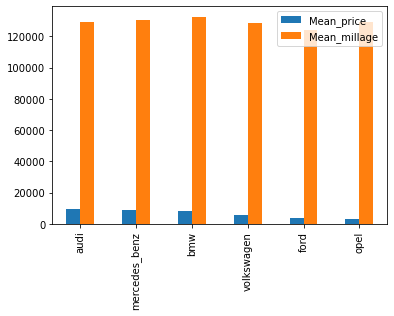

In [70]:
df_price_millage.plot.bar()
#bothh scale are diferent there for price not showing , we need to make the same scale 

In [71]:
normalized=df_price_millage.copy()
normalized

,Mean_price,Mean_millage
audi,9336.687454,129157.386785
mercedes_benz,8628.450366,130788.363313
bmw,8332.820518,132572.513140
volkswagen,5402.410262,128707.158791
ford,3749.469507,124266.012872
opel,2975.241935,129310.035842


In [72]:
normalized['Mean_price'].sum()

38425.08004151806

In [73]:
# normalized["Mean_price"]=normalized['Mean_price']/normalized['Mean_price'].sum()
# normalized["Mean_millage"]=normalized['Mean_millage']/normalized['Mean_millage'].sum()

# normalized

#this is lenghty way to make normalized if we have many columns

In [75]:
col=normalized.columns
col

Index(['Mean_price', 'Mean_millage'], dtype='object')

In [77]:
for i in col:
    print(i)
    

Mean_price
Mean_millage


In [79]:
for i in col:
    normalized[i]=normalized[i]/normalized[i].sum()

normalized
#now data is in same scale of measurement and now we can daw a graph

,Mean_price,Mean_millage
audi,0.242984,0.166697
mercedes_benz,0.224553,0.168802
bmw,0.216859,0.171105
volkswagen,0.140596,0.166116
ford,0.097579,0.160384
opel,0.077430,0.166894


# Bar char

<AxesSubplot:>

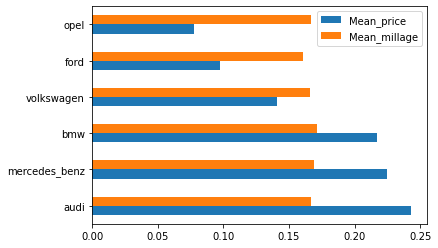

In [113]:
normalized.plot.barh()

<AxesSubplot:title={'center':'Barand mean price and millage'}>

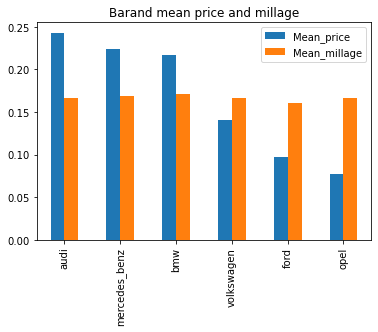

In [114]:
normalized.plot.bar(title="Barand mean price and millage")
#millage is almost same

<AxesSubplot:title={'center':'Barand mean price and millage'}>

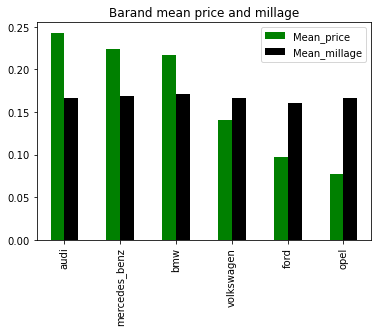

In [115]:
normalized.plot.bar(title="Barand mean price and millage",color=["g","k"])
#millage is almost same

<AxesSubplot:title={'center':'Barand mean price and millage'}>

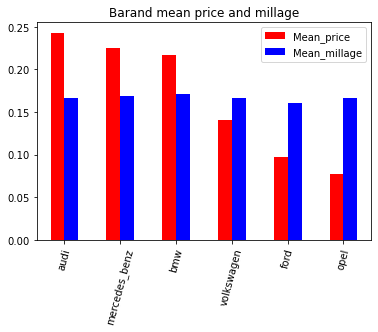

In [118]:
normalized.plot.bar(title="Barand mean price and millage",color=["r","b"],rot=75)
#millage is almost same

Text(0, 0.5, 'Density')

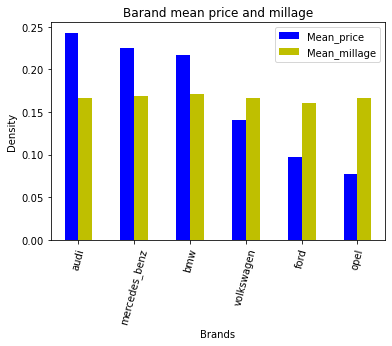

In [123]:
normalized.plot.bar(title="Barand mean price and millage",color=["b","y"],rot=75)
plt.xlabel("Brands")
plt.ylabel("Density")
#millage is almost same

# pie char

<AxesSubplot:ylabel='Mean_price'>

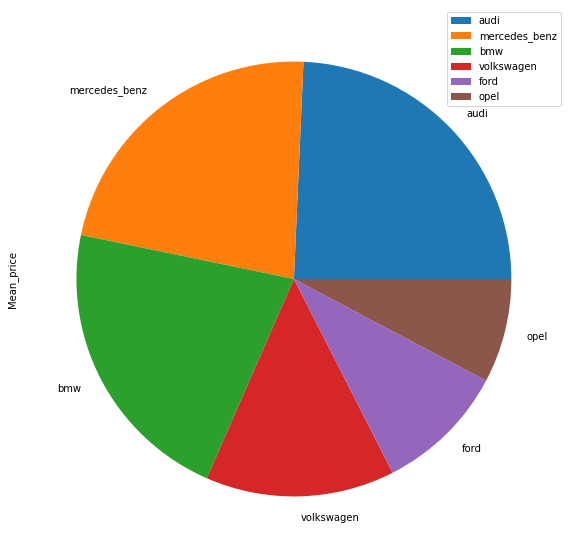

In [96]:
normalized.plot.pie(y="Mean_price",figsize=(10, 10))

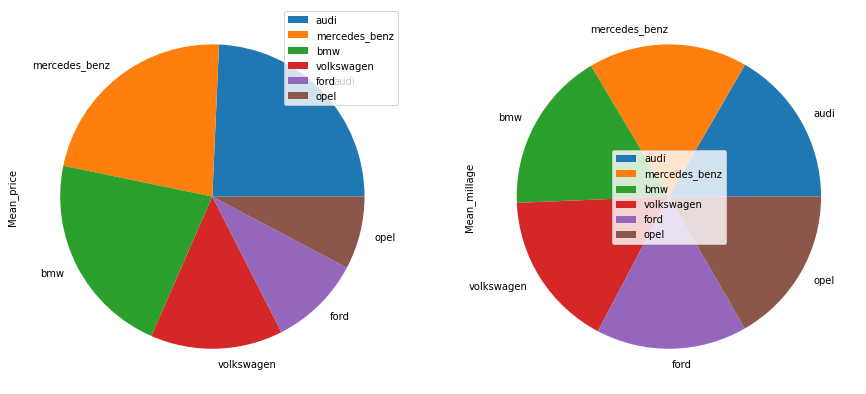

In [107]:
normalized.plot.pie(subplots=True, figsize=(15, 15))
plt.legend(loc="center")#10=center
plt.show()

# now it is confrim that VOLKSWAGEN is best, but we need to check which model is also best.

In [124]:
popular_brands.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,300,test,limousine,1995,manuell,90,golf,150000,8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,1990,control,limousine,1998,manuell,90,golf,150000,12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32


In [129]:
pop_models=popular_brands.groupby("brand")["model"].value_counts()
pop_models

brand       model  
audi        a4         1231
            a3          825
            a6          797
            andere      216
            80          198
                       ... 
volkswagen  up           51
            jetta        38
            phaeton      31
            cc           18
            amarok        6
Name: model, Length: 96, dtype: int64

# now we need just top brands and there models

In [139]:
pop_models["audi"].index[0]

'a4'

In [147]:
c_b=common_brand.index
c_b

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [148]:
for i in c_b:
    print(i)

volkswagen
bmw
opel
mercedes_benz
audi
ford


In [151]:
top_brand_model={}
for i in c_b:
    model=pop_models[i].index[0]
    top_brand_model[i]=model
    
print(top_brand_model)    

{'volkswagen': 'golf', 'bmw': '3er', 'opel': 'corsa', 'mercedes_benz': 'c_klasse', 'audi': 'a4', 'ford': 'focus'}


In [152]:
top_brand_model

{'volkswagen': 'golf',
 'bmw': '3er',
 'opel': 'corsa',
 'mercedes_benz': 'c_klasse',
 'audi': 'a4',
 'ford': 'focus'}